In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = 'adult_data/adult.data'

columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

df = pd.read_csv(file_path, header=None, names=columns, skipinitialspace=True)

display(df.head(10))


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Imputando education com knn

In [4]:
# 1. Carrega dados e seleciona coluna education
file_path = 'adult_data/adult.data'
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

df = pd.read_csv(file_path, header=None, names=columns, skipinitialspace=True)

# 2. Ordena categorias de education (ordinal)
df['education_ordinal'] = df['education-num']


# 3. Salva coluna original (sem missing) para comparar depois
df['education_ordinal_original'] = df['education_ordinal'].copy()

# 4. Gera 10% valores ausentes (MCAR) em education_ordinal
np.random.seed(42)
missing_mask = df.sample(frac=0.10).index
df.loc[missing_mask, 'education_ordinal'] = np.nan

# 5. Prepara dados para imputação (exemplo com colunas numéricas relevantes)
features = ['age', 'fnlwgt', 'education_ordinal', 'hours-per-week', 'capital-gain', 'capital-loss']
df_knn = df[features]

# 6. Aplica KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_knn)
df['education_imputed'] = df_imputed[:, features.index('education_ordinal')]

# 7. Avaliação: compara só os indices com missing
original_values = df.loc[missing_mask, 'education_ordinal_original']
imputed_values = df.loc[missing_mask, 'education_imputed'].round().astype(int)  # arredonda para categoria inteira

# 8. Calcula acurácia do KNN
accuracy_knn = accuracy_score(original_values, imputed_values) * 100

# 9. Baseline 1: imputação aleatória (1/n)
num_classes = df['education'].nunique()
accuracy_random = 100 / num_classes

# 10. Baseline 2: imputação pela moda
most_frequent = df['education_ordinal_original'].mode()[0]
accuracy_moda = accuracy_score(original_values, [most_frequent]*len(original_values)) * 100

# 11. Resultados
print(f"Acurácia imputação com KNN: {accuracy_knn:.2f}%")
print(f"Acurácia da imputação aleatória (1/{num_classes}): {accuracy_random:.2f}%")
print(f"Acurácia da imputação pela moda: {accuracy_moda:.2f}%")
print(f"➡️ KNN é {accuracy_knn / accuracy_random:.2f}x melhor que o acaso.")
print(f"➡️ KNN é {accuracy_knn / accuracy_moda:.2f}x melhor que a moda.")


results = []

# Após calcular as acurácias:
results.append({
    'variavel': 'education',
    'metodo': 'KNN',
    'acuracia': accuracy_knn,
    'num_categorias': df['education'].nunique()
})
results.append({
    'variavel': 'education',
    'metodo': 'Aleatória',
    'acuracia': accuracy_random,
    'num_categorias': df['education'].nunique()
})
results.append({
    'variavel': 'education',
    'metodo': 'Moda',
    'acuracia': accuracy_moda,
    'num_categorias': df['education'].nunique()
})

Acurácia imputação com KNN: 15.94%
Acurácia da imputação aleatória (1/16): 6.25%
Acurácia da imputação pela moda: 31.70%
➡️ KNN é 2.55x melhor que o acaso.
➡️ KNN é 0.50x melhor que a moda.


In [5]:
# 1. Carrega dados e seleciona colunas
file_path = 'adult_data/adult.data'
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

df = pd.read_csv(file_path, header=None, names=columns, skipinitialspace=True)

# 2. Salva coluna original para avaliação
df['race_original'] = df['race'].copy()

# 3. One-Hot Encoding para 'race'
race_dummies = pd.get_dummies(df['race'], prefix='race')

# 4. Introduz 10% de valores ausentes (MCAR) em 'race'
np.random.seed(42)
missing_mask = df.sample(frac=0.10).index
df.loc[missing_mask, 'race'] = np.nan

# 5. Remove os one-hot das linhas com 'race' faltando
race_dummies = race_dummies.astype(float)
race_dummies.loc[missing_mask] = np.nan


# 6. Junta com variáveis numéricas para imputação
features = ['age', 'fnlwgt', 'hours-per-week', 'capital-gain', 'capital-loss']
df_features = df[features].copy()
df_encoded = pd.concat([df_features, race_dummies], axis=1)

# 7. Aplica KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_encoded)

# 8. Recupera as colunas one-hot imputadas
imputed_race_values = df_imputed[:, -race_dummies.shape[1]:]
imputed_race_labels = pd.DataFrame(imputed_race_values, columns=race_dummies.columns)
imputed_race = imputed_race_labels.idxmax(axis=1).str.replace('race_', '')

# 9. Avaliação: compara imputação com valores reais
original_values = df.loc[missing_mask, 'race_original']
imputed_values = imputed_race.loc[missing_mask]

accuracy_knn = accuracy_score(original_values, imputed_values) * 100

# 10. Baseline aleatória
num_classes = df['race_original'].nunique()
accuracy_random = 100 / num_classes

# 11. Baseline moda
most_frequent = df['race_original'].mode()[0]
accuracy_moda = accuracy_score(original_values, [most_frequent]*len(original_values)) * 100

# 12. Resultados
print(f"Acurácia imputação com KNN: {accuracy_knn:.2f}%")
print(f"Acurácia da imputação aleatória (1/{num_classes}): {accuracy_random:.2f}%")
print(f"Acurácia da imputação pela moda: {accuracy_moda:.2f}%")
print(f"➡️ KNN é {accuracy_knn / accuracy_random:.2f}x melhor que o acaso.")
print(f"➡️ KNN é {accuracy_knn / accuracy_moda:.2f}x melhor que a moda.")

# Após calcular as acurácias:
results.append({
    'variavel': 'race',
    'metodo': 'KNN',
    'acuracia': accuracy_knn,
    'num_categorias': df['race'].nunique()
})
results.append({
    'variavel': 'race',
    'metodo': 'Aleatória',
    'acuracia': accuracy_random,
    'num_categorias': df['race'].nunique()
})
results.append({
    'variavel': 'race',
    'metodo': 'Moda',
    'acuracia': accuracy_moda,
    'num_categorias': df['race'].nunique()
})

Acurácia imputação com KNN: 83.72%
Acurácia da imputação aleatória (1/5): 20.00%
Acurácia da imputação pela moda: 85.63%
➡️ KNN é 4.19x melhor que o acaso.
➡️ KNN é 0.98x melhor que a moda.


In [6]:
# 1. Carrega dados e seleciona colunas
file_path = 'adult_data/adult.data'
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

df = pd.read_csv(file_path, header=None, names=columns, skipinitialspace=True)

# 2. Salva coluna original para avaliação
df['marital_original'] = df['marital-status'].copy()

# 3. One-Hot Encoding para 'marital-status'
marital_dummies = pd.get_dummies(df['marital-status'], prefix='marital')

# 4. Introduz 10% de valores ausentes (MCAR) em 'marital-status'
np.random.seed(42)
missing_mask = df.sample(frac=0.10).index
df.loc[missing_mask, 'marital-status'] = np.nan

# 5. Remove os one-hot das linhas com 'marital-status' faltando
marital_dummies = marital_dummies.astype(float)
marital_dummies.loc[missing_mask] = np.nan


# 6. Junta com variáveis numéricas para imputação
features = ['age', 'fnlwgt', 'hours-per-week', 'capital-gain', 'capital-loss']
df_features = df[features].copy()
df_encoded = pd.concat([df_features, marital_dummies], axis=1)

# 7. Aplica KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_encoded)

# 8. Recupera as colunas one-hot imputadas
imputed_marital_values = df_imputed[:, -marital_dummies.shape[1]:]
imputed_marital_labels = pd.DataFrame(imputed_marital_values, columns=marital_dummies.columns)
imputed_marital = imputed_marital_labels.idxmax(axis=1).str.replace('marital_', '')

# 9. Avaliação: compara imputação com valores reais
original_values = df.loc[missing_mask, 'marital_original']
imputed_values = imputed_marital.loc[missing_mask]

accuracy_knn = accuracy_score(original_values, imputed_values) * 100

# 10. Baseline aleatória
num_classes = df['marital_original'].nunique()
accuracy_random = 100 / num_classes

# 11. Baseline moda
most_frequent = df['marital_original'].mode()[0]
accuracy_moda = accuracy_score(original_values, [most_frequent]*len(original_values)) * 100

# 12. Resultados
print(f"Acurácia imputação com KNN: {accuracy_knn:.2f}%")
print(f"Acurácia da imputação aleatória (1/{num_classes}): {accuracy_random:.2f}%")
print(f"Acurácia da imputação pela moda: {accuracy_moda:.2f}%")
print(f"➡️ KNN é {accuracy_knn / accuracy_random:.2f}x melhor que o acaso.")
print(f"➡️ KNN é {accuracy_knn / accuracy_moda:.2f}x melhor que a moda.")

# 13. Armazena resultados
results.append({
    'variavel': 'marital-status',
    'metodo': 'KNN',
    'acuracia': accuracy_knn,
    'num_categorias': df['marital_original'].nunique()
})
results.append({
    'variavel': 'marital-status',
    'metodo': 'Aleatória',
    'acuracia': accuracy_random,
    'num_categorias': df['marital_original'].nunique()
})
results.append({
    'variavel': 'marital-status',
    'metodo': 'Moda',
    'acuracia': accuracy_moda,
    'num_categorias': df['marital_original'].nunique()
})


Acurácia imputação com KNN: 45.85%
Acurácia da imputação aleatória (1/7): 14.29%
Acurácia da imputação pela moda: 45.79%
➡️ KNN é 3.21x melhor que o acaso.
➡️ KNN é 1.00x melhor que a moda.


In [7]:
# 1. Carrega dados e seleciona colunas
file_path = 'adult_data/adult.data'
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

df = pd.read_csv(file_path, header=None, names=columns, skipinitialspace=True)

# 2. Salva coluna original para avaliação
df['occupation_original'] = df['occupation'].copy()

# 3. One-Hot Encoding para 'occupation'
occupation_dummies = pd.get_dummies(df['occupation'], prefix='occupation')

# 4. Introduz 10% de valores ausentes (MCAR) em 'occupation'
np.random.seed(42)
missing_mask = df.sample(frac=0.10).index
df.loc[missing_mask, 'occupation'] = np.nan

# 5. Remove os one-hot das linhas com 'occupation' faltando
occupation_dummies = occupation_dummies.astype(float)
occupation_dummies.loc[missing_mask] = np.nan


# 6. Junta com variáveis numéricas para imputação
features = ['age', 'fnlwgt', 'hours-per-week', 'capital-gain', 'capital-loss']
df_features = df[features].copy()
df_encoded = pd.concat([df_features, occupation_dummies], axis=1)

# 7. Aplica KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_encoded)

# 8. Recupera as colunas one-hot imputadas
imputed_occupation_values = df_imputed[:, -occupation_dummies.shape[1]:]
imputed_occupation_labels = pd.DataFrame(imputed_occupation_values, columns=occupation_dummies.columns)
imputed_occupation = imputed_occupation_labels.idxmax(axis=1).str.replace('occupation_', '')

# 9. Avaliação: compara imputação com valores reais
original_values = df.loc[missing_mask, 'occupation_original']
imputed_values = imputed_occupation.loc[missing_mask]

accuracy_knn = accuracy_score(original_values, imputed_values) * 100

# 10. Baseline aleatória
num_classes = df['occupation_original'].nunique()
accuracy_random = 100 / num_classes

# 11. Baseline moda
most_frequent = df['occupation_original'].mode()[0]
accuracy_moda = accuracy_score(original_values, [most_frequent]*len(original_values)) * 100

# 12. Resultados
print(f"Acurácia imputação com KNN: {accuracy_knn:.2f}%")
print(f"Acurácia da imputação aleatória (1/{num_classes}): {accuracy_random:.2f}%")
print(f"Acurácia da imputação pela moda: {accuracy_moda:.2f}%")
print(f"➡️ KNN é {accuracy_knn / accuracy_random:.2f}x melhor que o acaso.")
print(f"➡️ KNN é {accuracy_knn / accuracy_moda:.2f}x melhor que a moda.")

# 13. Armazena resultados
results.append({
    'variavel': 'occupation',
    'metodo': 'KNN',
    'acuracia': accuracy_knn,
    'num_categorias': df['occupation_original'].nunique()
})
results.append({
    'variavel': 'occupation',
    'metodo': 'Aleatória',
    'acuracia': accuracy_random,
    'num_categorias': df['occupation_original'].nunique()
})
results.append({
    'variavel': 'occupation',
    'metodo': 'Moda',
    'acuracia': accuracy_moda,
    'num_categorias': df['occupation_original'].nunique()
})


Acurácia imputação com KNN: 12.32%
Acurácia da imputação aleatória (1/15): 6.67%
Acurácia da imputação pela moda: 13.11%
➡️ KNN é 1.85x melhor que o acaso.
➡️ KNN é 0.94x melhor que a moda.


In [8]:
# 1. Carrega dados e seleciona colunas
file_path = 'adult_data/adult.data'
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

df = pd.read_csv(file_path, header=None, names=columns, skipinitialspace=True)

# 2. Salva coluna original para avaliação
df['sex_original'] = df['sex'].copy()

# 3. One-Hot Encoding para 'sex'
sex_dummies = pd.get_dummies(df['sex'], prefix='sex')

# 4. Introduz 10% de valores ausentes (MCAR) em 'sex'
np.random.seed(42)
missing_mask = df.sample(frac=0.10).index
df.loc[missing_mask, 'sex'] = np.nan

# 5. Remove os one-hot das linhas com 'sex' faltando
sex_dummies = sex_dummies.astype(float)
sex_dummies.loc[missing_mask] = np.nan


# 6. Junta com variáveis numéricas para imputação
features = ['age', 'fnlwgt', 'hours-per-week', 'capital-gain', 'capital-loss']
df_features = df[features].copy()
df_encoded = pd.concat([df_features, sex_dummies], axis=1)

# 7. Aplica KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_encoded)

# 8. Recupera as colunas one-hot imputadas
imputed_sex_values = df_imputed[:, -sex_dummies.shape[1]:]
imputed_sex_labels = pd.DataFrame(imputed_sex_values, columns=sex_dummies.columns)
imputed_sex = imputed_sex_labels.idxmax(axis=1).str.replace('sex_', '')

# 9. Avaliação: compara imputação com valores reais
original_values = df.loc[missing_mask, 'sex_original']
imputed_values = imputed_sex.loc[missing_mask]

accuracy_knn = accuracy_score(original_values, imputed_values) * 100

# 10. Baseline aleatória
num_classes = df['sex_original'].nunique()
accuracy_random = 100 / num_classes

# 11. Baseline moda
most_frequent = df['sex_original'].mode()[0]
accuracy_moda = accuracy_score(original_values, [most_frequent]*len(original_values)) * 100

# 12. Resultados
print(f"Acurácia imputação com KNN: {accuracy_knn:.2f}%")
print(f"Acurácia da imputação aleatória (1/{num_classes}): {accuracy_random:.2f}%")
print(f"Acurácia da imputação pela moda: {accuracy_moda:.2f}%")
print(f"➡️ KNN é {accuracy_knn / accuracy_random:.2f}x melhor que o acaso.")
print(f"➡️ KNN é {accuracy_knn / accuracy_moda:.2f}x melhor que a moda.")

# 13. Armazena resultados
results.append({
    'variavel': 'sex',
    'metodo': 'KNN',
    'acuracia': accuracy_knn,
    'num_categorias': df['sex_original'].nunique()
})
results.append({
    'variavel': 'sex',
    'metodo': 'Aleatória',
    'acuracia': accuracy_random,
    'num_categorias': df['sex_original'].nunique()
})
results.append({
    'variavel': 'sex',
    'metodo': 'Moda',
    'acuracia': accuracy_moda,
    'num_categorias': df['sex_original'].nunique()
})


Acurácia imputação com KNN: 67.94%
Acurácia da imputação aleatória (1/2): 50.00%
Acurácia da imputação pela moda: 67.75%
➡️ KNN é 1.36x melhor que o acaso.
➡️ KNN é 1.00x melhor que a moda.


In [9]:
# 1. Carrega dados e seleciona colunas
file_path = 'adult_data/adult.data'
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

df = pd.read_csv(file_path, header=None, names=columns, skipinitialspace=True)

# 2. Salva coluna original para avaliação
df['relationship_original'] = df['relationship'].copy()

# 3. One-Hot Encoding para 'relationship'
relationship_dummies = pd.get_dummies(df['relationship'], prefix='relationship')

# 4. Introduz 10% de valores ausentes (MCAR) em 'relationship'
np.random.seed(42)
missing_mask = df.sample(frac=0.10).index
df.loc[missing_mask, 'relationship'] = np.nan

# 5. Remove os one-hot das linhas com 'relationship' faltando
relationship_dummies = relationship_dummies.astype(float)
relationship_dummies.loc[missing_mask] = np.nan

# 6. Junta com variáveis numéricas para imputação
features = ['age', 'fnlwgt', 'hours-per-week', 'capital-gain', 'capital-loss']
df_features = df[features].copy()
df_encoded = pd.concat([df_features, relationship_dummies], axis=1)

# 7. Aplica KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_encoded)

# 8. Recupera as colunas one-hot imputadas
imputed_relationship_values = df_imputed[:, -relationship_dummies.shape[1]:]
imputed_relationship_labels = pd.DataFrame(imputed_relationship_values, columns=relationship_dummies.columns)
imputed_relationship = imputed_relationship_labels.idxmax(axis=1).str.replace('relationship_', '')

# 9. Avaliação: compara imputação com valores reais
original_values = df.loc[missing_mask, 'relationship_original']
imputed_values = imputed_relationship.loc[missing_mask]

accuracy_knn = accuracy_score(original_values, imputed_values) * 100

# 10. Baseline aleatória
num_classes = df['relationship_original'].nunique()
accuracy_random = 100 / num_classes

# 11. Baseline moda
most_frequent = df['relationship_original'].mode()[0]
accuracy_moda = accuracy_score(original_values, [most_frequent]*len(original_values)) * 100

# 12. Resultados
print(f"Acurácia imputação com KNN: {accuracy_knn:.2f}%")
print(f"Acurácia da imputação aleatória (1/{num_classes}): {accuracy_random:.2f}%")
print(f"Acurácia da imputação pela moda: {accuracy_moda:.2f}%")
print(f"➡️ KNN é {accuracy_knn / accuracy_random:.2f}x melhor que o acaso.")
print(f"➡️ KNN é {accuracy_knn / accuracy_moda:.2f}x melhor que a moda.")

# 13. Armazena resultados
results.append({
    'variavel': 'relationship',
    'metodo': 'KNN',
    'acuracia': accuracy_knn,
    'num_categorias': df['relationship_original'].nunique()
})
results.append({
    'variavel': 'relationship',
    'metodo': 'Aleatória',
    'acuracia': accuracy_random,
    'num_categorias': df['relationship_original'].nunique()
})
results.append({
    'variavel': 'relationship',
    'metodo': 'Moda',
    'acuracia': accuracy_moda,
    'num_categorias': df['relationship_original'].nunique()
})


Acurácia imputação com KNN: 38.76%
Acurácia da imputação aleatória (1/6): 16.67%
Acurácia da imputação pela moda: 40.36%
➡️ KNN é 2.33x melhor que o acaso.
➡️ KNN é 0.96x melhor que a moda.


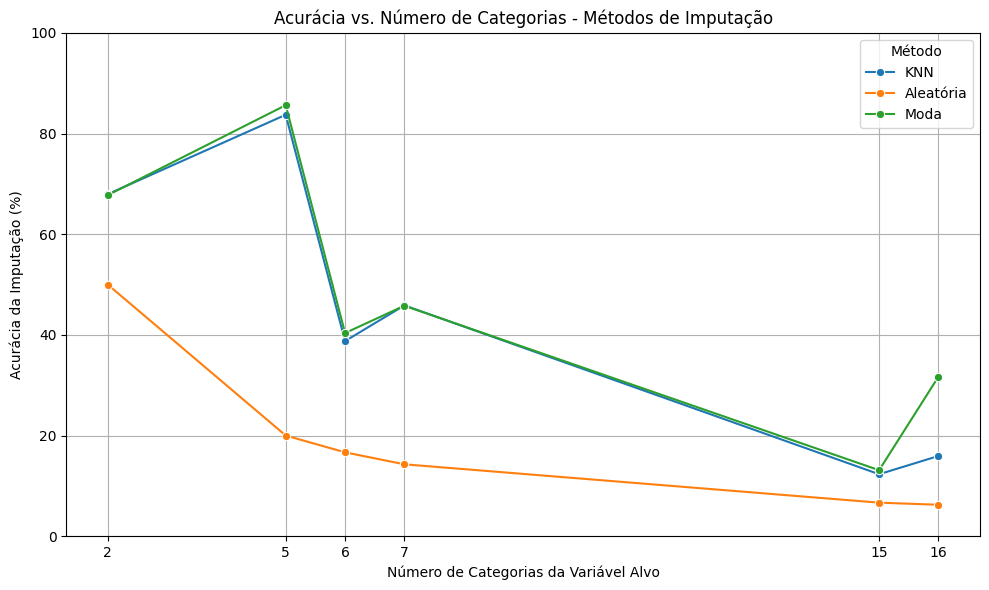

In [10]:
df_results = pd.DataFrame(results)

# Gráfico de linhas com número de categorias no eixo X
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_results, x='num_categorias', y='acuracia', hue='metodo', marker='o')

plt.title('Acurácia vs. Número de Categorias - Métodos de Imputação')
plt.xlabel('Número de Categorias da Variável Alvo')
plt.ylabel('Acurácia da Imputação (%)')
plt.ylim(0, 100)
plt.xticks(df_results['num_categorias'].unique())
plt.grid(True)
plt.tight_layout()
plt.legend(title='Método')
plt.show()